<a href="https://colab.research.google.com/github/SerynaPayne/Seryna_INFO4670_Spring2026/blob/main/Seryna_Payne_Assignment3_AssociationRuleMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 — Association Rule Mining

**Dataset:** `bread_basket.csv` (11569 transactions)

Fill in the short answer cells and run the code cells. This notebook generates the required tables and figures.

**Sections:**
1. Setup & Data Load
2. EDA (a–e)
3. Frequent Itemset Mining (FP-Growth)
4. Association Rules + Report Table
5. Rule Subgraph (Bread, Coffee, Cake, Tea)
6. Interpretation Prompt


## 1) Setup & Data Load (10 pts)
- Place `bread_basket.csv` in the same folder as this notebook **or** update the path below.
- Needed packages: `pandas`, `matplotlib`, `mlxtend`, `networkx` (for the small graph).
- If a package is missing, run the `pip install` cell.

In [6]:
# run the pip install cell
%pip install pandas mlxtend matplotlib networkx

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# place bread_basket.csv in the notebook
CSV_PATH = "bread_basket.csv"
bread = pd.read_csv(CSV_PATH)

# remove depreciation warnings
import warnings
warnings.filterwarnings('ignore')

## 2) EDA (a–e) (30 pts)
### a) List variables and their dtypes (5 pts)

In [7]:
# list variables and their data types
bread.info()

# transaction variable is an integer
# item variable is an object
# date_time variable is an object
# time variable is an object
# period_day variable is an object
# weekday_weekend variable is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   transaction      20507 non-null  int64 
 1   item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   time             20507 non-null  object
 4   period_day       20507 non-null  object
 5   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(5)
memory usage: 961.4+ KB


### b) "Statistics" overview (5 pts)
Use `describe(include='all')` as a stand‑in for RapidMiner's Statistics. Take a screenshot when you submit.

In [8]:
# statistics overview
bread.describe(include='all')

,transaction,item,date_time,time,period_day,weekday_weekend
count,20507.000000,20507,20507,20507,20507,20507
unique,NaN,94,159,1255,4,2
top,NaN,Coffee,2017-02-04,11:06,afternoon,weekday
freq,NaN,5471,292,52,11569,12807
mean,4976.202370,NaN,NaN,NaN,NaN,NaN
std,2796.203001,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2552.000000,NaN,NaN,NaN,NaN,NaN
50%,5137.000000,NaN,NaN,NaN,NaN,NaN
75%,7357.000000,NaN,NaN,NaN,NaN,NaN


### c) Bar plot — count of **unique transactions per item** (10 pts)
Set the subtitle to your **FirstName LastName**. Take a screenshot of the figure.

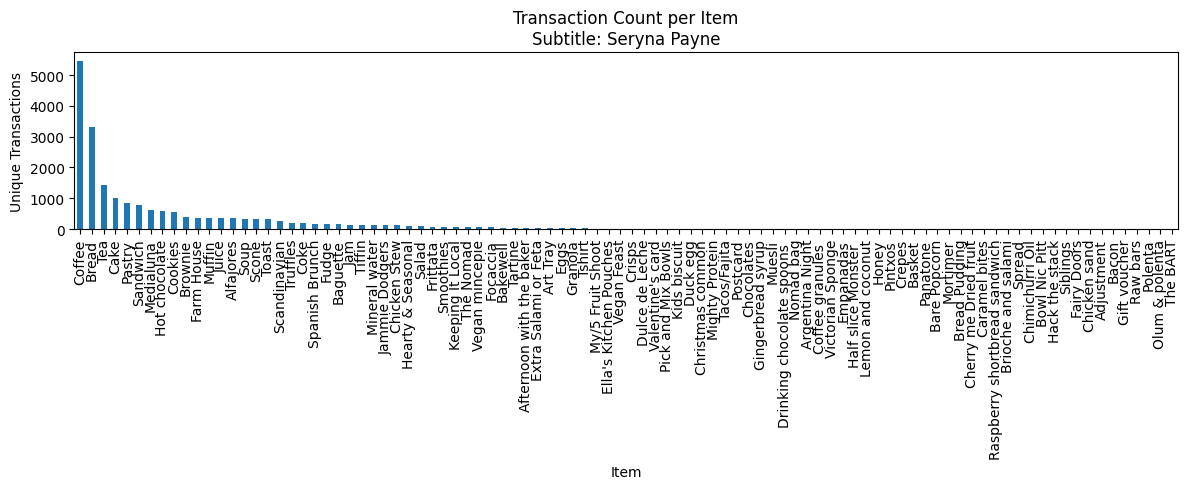

In [9]:
# c) Bar plot of transaction counts per item
subtitle = "Seryna Payne"
item_counts = (bread.groupby('item')
                 .size()
                 .sort_values(ascending=False))

ax = item_counts.plot(kind='bar', figsize=(12,5))
plt.title(f"Transaction Count per Item\nSubtitle: {subtitle}")
plt.xlabel("Item"); plt.ylabel("Unique Transactions")
plt.tight_layout()
plt.show()

### d) Report counts for Coffee, Tea, Alfajores, Juice, and Chicken Stew (10 pts)

In [10]:
# report counts
items = ['Coffee', 'Tea', 'Alfajores', 'Juice', 'Chicken Stew']
item_counts = (bread.groupby('item'))

# show item counts
for item in items:
    print(f"{item}: {item_counts.get_group(item).size}")

Coffee: 32826
Tea: 8610
Alfajores: 2214
Juice: 2214
Chicken Stew: 738


## 3) Frequent Itemset Mining with FP‑Growth (min_support = 0.2) (20 pts)
We pivot the data to a **transaction × item** one‑hot table (boolean), then run FP‑Growth.

In [14]:
# build a list of items per transaction
N = 20507
basket = (bread.groupby('transaction')['item'].apply(list)
                 .reset_index()
                 .sort_values('transaction')
                 .head(N)['item']
                 .tolist())

# one-hot encode
te = TransactionEncoder()
oht = pd.DataFrame(te.fit(basket).transform(basket), columns=te.columns_).astype(bool)
oht.shape

# frequent itemsets thresholds
minsup = 0.02
minconf = 0.1
freq = fpgrowth(oht, min_support=minsup, use_colnames=True)

#run fp-growth
freq.sort_values('support', ascending=False)

,support,itemsets
5,0.478394,(Coffee)
0,0.327205,(Bread)
8,0.142631,(Tea)
12,0.103856,(Cake)
19,0.090016,"(Bread, Coffee)"
6,0.086107,(Pastry)
13,0.071844,(Sandwich)
7,0.061807,(Medialuna)
2,0.058320,(Hot chocolate)
28,0.054728,"(Cake, Coffee)"


## 4) Association Rules + Report Table (30 pts)
(metric = confidence, min_threshold = ?) Please find a suitable min_threshold

In [15]:
# association rules and report table
rules = association_rules(freq, metric='confidence', min_threshold=minconf) # minconf = 0.1
rules[['antecedents','consequents','support','confidence','lift']].sort_values(['confidence'], ascending=False)

,antecedents,consequents,support,confidence,lift
17,(Toast),(Coffee),0.023666,0.704403,1.472431
6,(Medialuna),(Coffee),0.035182,0.569231,1.189878
4,(Pastry),(Coffee),0.047544,0.552147,1.154168
10,(Juice),(Coffee),0.020602,0.534247,1.116750
16,(Sandwich),(Coffee),0.038246,0.532353,1.112792
11,(Cake),(Coffee),0.054728,0.526958,1.101515
3,(Cookies),(Coffee),0.028209,0.518447,1.083723
2,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311
7,(Tea),(Coffee),0.049868,0.349630,0.730840
5,(Pastry),(Bread),0.029160,0.338650,1.034977


## 5) Interpretation (10 pts)
**Interpret the rule `{Coffee, Cake} ⇒ {Bread}` in plain English.**

- **Support**: What fraction of *all* transactions contain Coffee, Cake, and Bread together?
- **Confidence**: Among baskets with Coffee and Cake, what share also include Bread?
- **Lift > 1** implies positive association; comment on practical meaning.

Support: The fraction of all transactions that contain coffee, cake, and bread together is the number of transactions that contain coffee, cake, and bread divided by 20507 (the number of transactions in the dataset).

Confidence: Among baskets with coffee and cake, the share that also include bread would be represented by the ratio of transactions that contain coffee, cake, and bread over the amount of transactions that contain coffee and cake.

Lift > 1: The positive association that lift implies means that through the transactions, customers are more likely to buy items together rather than purchase them individually. In this rule, when the lift is greater than 1, that means that customers who buy coffee and cake are more likely to also buy bread, compared to these items being purchased individually.

>